Load and normalize CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

batch_size = 64
trainset = torchvision.datasets.FashionMNIST(
    root = './data',
    train = True,
    download = True,
    transform = transform
)

trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size = batch_size,
    shuffle = True,
    num_workers = 2
)

testset = torchvision.datasets.FashionMNIST(
    root = './data',
    train = False,
    download = True,
    transform = transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size = batch_size,
    shuffle = False,
    num_workers = 2
)


100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [3]:
#show some of the training images for fun.

import matplotlib.pyplot as plt
import numpy as np

Define a Convolutional Neural Network

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

Define a Loss function and optimizer

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train the network

In [13]:
for epoch in range(2):
    train(autoencoder, train_loader)

    # 디코더에서 나온 이미지를 시각화 하기
    # 앞서 시각화를 위해 남겨둔 5개의 이미지를 한 이폭만큼 학습을 마친 모델에 넣어 복원이미지를 만듭니다.
    test_x = view_data.to(DEVICE)
    _, decoded_data = autoencoder(test_x)

    # 원본과 디코딩 결과 비교해보기
    f, a = plt.subplots(2, 5, figsize=(5, 2))
    print("[Epoch {}]".format(epoch))
    for i in range(5):
        img = np.reshape(view_data.data.numpy()[i],(28, 28)) #파이토치 텐서를 넘파이로 변환합니다.
        a[0][i].imshow(img, cmap='gray')
        a[0][i].set_xticks(()); a[0][i].set_yticks(())

    for i in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28)) 
        # CUDA를 사용하면 모델 출력값이 GPU에 남아있으므로 .to("cpu") 함수로 일반메모리로 가져와 numpy행렬로 변환합니다.
        # cpu를 사용할때에도 같은 코드를 사용해도 무방합니다.
        a[1][i].imshow(img, cmap='gray')
        a[1][i].set_xticks(()); a[1][i].set_yticks(())
    plt.show()

NameError: name 'train' is not defined

In [11]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch+1}, {i+1:5d}] loss: {running_loss/2000:.3f}')
            running_loss = 0.0

print('Finished Training')

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\ghkim\anaconda3\envs\VAE-ghkim\lib\site-packages\torch\utils\data\_utils\worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "c:\Users\ghkim\anaconda3\envs\VAE-ghkim\lib\site-packages\torch\utils\data\_utils\fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\Users\ghkim\anaconda3\envs\VAE-ghkim\lib\site-packages\torch\utils\data\_utils\fetch.py", line 58, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\Users\ghkim\anaconda3\envs\VAE-ghkim\lib\site-packages\torchvision\datasets\mnist.py", line 145, in __getitem__
    img = self.transform(img)
  File "c:\Users\ghkim\anaconda3\envs\VAE-ghkim\lib\site-packages\torchvision\transforms\transforms.py", line 95, in __call__
    img = t(img)
  File "c:\Users\ghkim\anaconda3\envs\VAE-ghkim\lib\site-packages\torch\nn\modules\module.py", line 1190, in _call_impl
    return forward_call(*input, **kwargs)
  File "c:\Users\ghkim\anaconda3\envs\VAE-ghkim\lib\site-packages\torchvision\transforms\transforms.py", line 270, in forward
    return F.normalize(tensor, self.mean, self.std, self.inplace)
  File "c:\Users\ghkim\anaconda3\envs\VAE-ghkim\lib\site-packages\torchvision\transforms\functional.py", line 360, in normalize
    return F_t.normalize(tensor, mean=mean, std=std, inplace=inplace)
  File "c:\Users\ghkim\anaconda3\envs\VAE-ghkim\lib\site-packages\torchvision\transforms\functional_tensor.py", line 940, in normalize
    return tensor.sub_(mean).div_(std)
RuntimeError: output with shape [1, 28, 28] doesn't match the broadcast shape [3, 28, 28]


In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Test the network on the test data

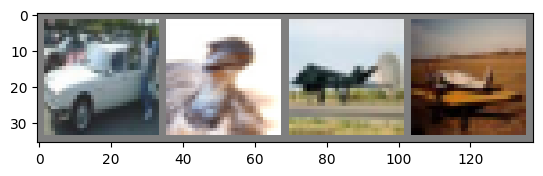

GroundTruth:  cat   ship  ship  plane


In [10]:
dataiter = iter(testloader)
image, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  car   bird  plane ship 


In [14]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100*correct//total} %')

Accuracy of the network on the 10000 test images: 55 %


In [15]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] +=1

for classname, correct_count in correct_pred.items():
    accuracy = 100*float(correct_count)/total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 55.0 %
Accuracy for class: car   is 76.0 %
Accuracy for class: bird  is 35.9 %
Accuracy for class: cat   is 25.8 %
Accuracy for class: deer  is 42.7 %
Accuracy for class: dog   is 67.6 %
Accuracy for class: frog  is 66.8 %
Accuracy for class: horse is 57.2 %
Accuracy for class: ship  is 73.5 %
Accuracy for class: truck is 55.8 %


Training on GPU

In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [17]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [18]:
inputs, labels = data[0].to(device), data[1].to(device)